<a href="https://colab.research.google.com/github/Kahuyo/C-/blob/main/5720ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch version: 2.9.0+cu126
Torchvision version: 0.24.0+cu126
GPU available: True
GPU model: Tesla T4
Training set size: 50000
Test set size: 10000
Training batches: 391, Test batches: 79


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Using device: cuda:0
Total parameters: 11,173,962
Starting training for 200 epochs...
Epoch   5/200 | Loss: 0.2845 | Train Acc:  90.31% | Test Acc:  87.97%
Epoch  10/200 | Loss: 0.1791 | Train Acc:  93.87% | Test Acc:  90.38% | Best:  90.38% | LR: 0.000994
Epoch  15/200 | Loss: 0.1258 | Train Acc:  95.66% | Test Acc:  91.94%
Epoch  20/200 | Loss: 0.0885 | Train Acc:  96.96% | Test Acc:  91.68% | Best:  92.61% | LR: 0.000976
Epoch  25/200 | Loss: 0.0709 | Train Acc:  97.55% | Test Acc:  92.51%
Epoch  30/200 | Loss: 0.0587 | Train Acc:  97.98% | Test Acc:  92.68% | Best:  92.68% | LR: 0.000946
Epoch  35/200 | Loss: 0.0469 | Train Acc:  98.33% | Test Acc:  92.80%
Epoch  40/200 | Loss: 0.0402 | Train Acc:  98.70% | Test Acc:  93.05% | Best:  93.12% | LR: 0.000905
Epoch  45/200 | Loss: 0.0340 | Train Acc:  98.84% | Test Acc:  93.38%
Epoch  50/200 | Loss: 0.0286 | Train Acc:  99.00% | Test Acc:  93.23% | Best:  93.79% | LR: 0.000854
Epoch  55/200 | Loss: 0.0254 | Train Acc:  99.13% | Test Ac

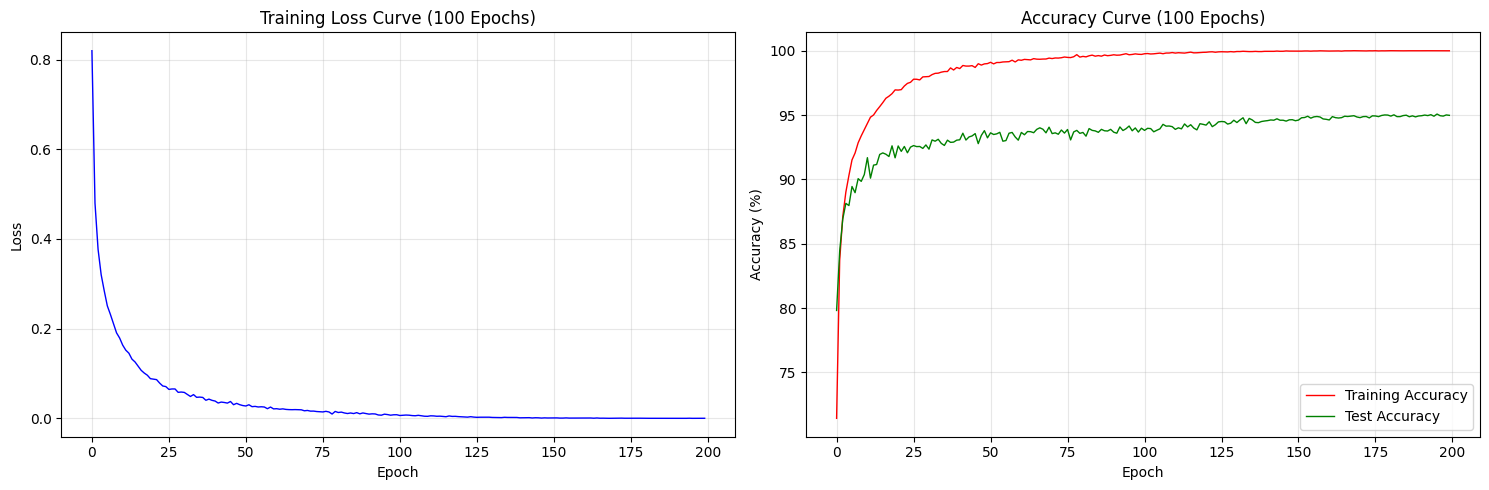


Confusion Matrix Evaluation
✅ Overall Accuracy: 95.08%


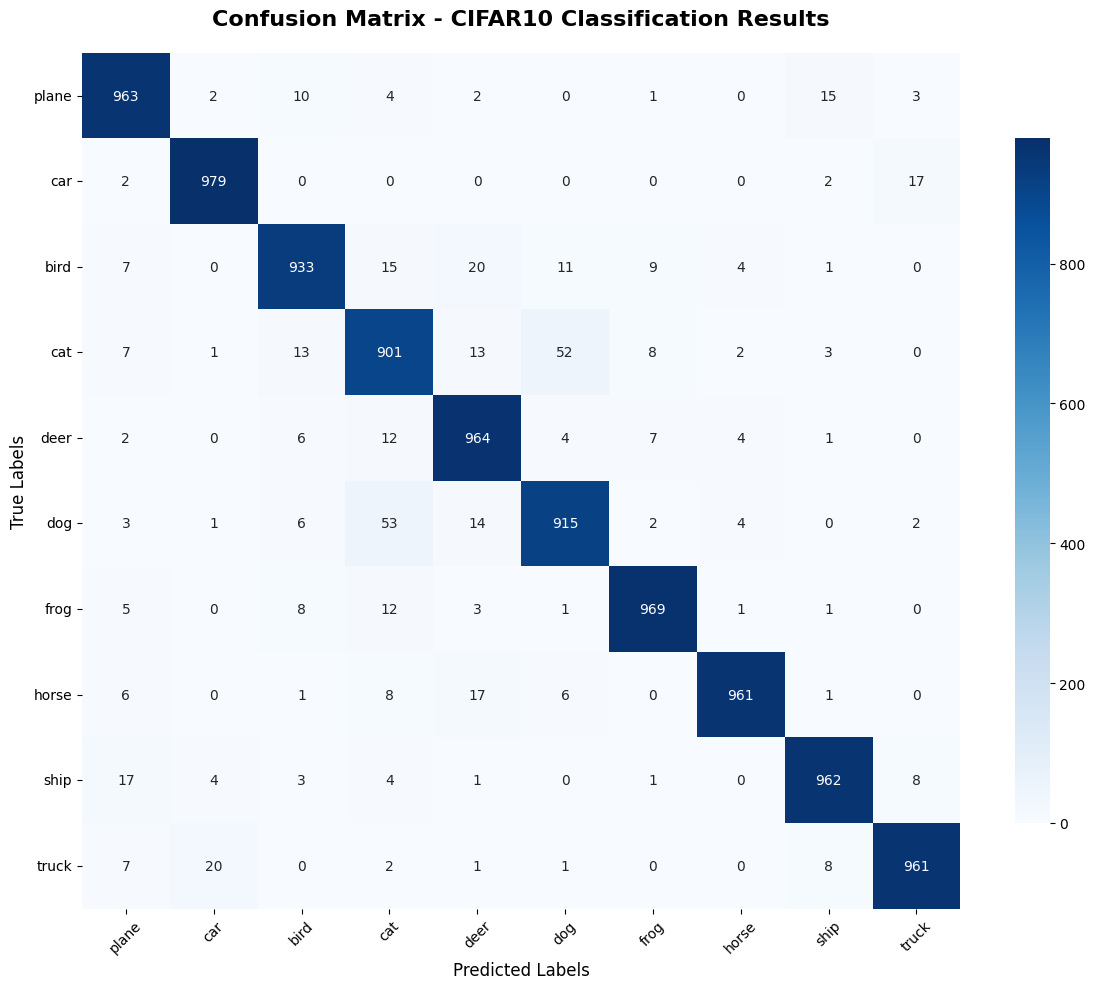


📊 Per-Class Accuracy:
  plane   :  96.30%
  car     :  97.90%
  bird    :  93.30%
  cat     :  90.10%
  deer    :  96.40%
  dog     :  91.50%
  frog    :  96.90%
  horse   :  96.10%
  ship    :  96.20%
  truck   :  96.10%

📋 Detailed Classification Report:
              precision    recall  f1-score   support

       plane     0.9450    0.9630    0.9539      1000
         car     0.9722    0.9790    0.9756      1000
        bird     0.9520    0.9330    0.9424      1000
         cat     0.8912    0.9010    0.8961      1000
        deer     0.9314    0.9640    0.9474      1000
         dog     0.9242    0.9150    0.9196      1000
        frog     0.9719    0.9690    0.9705      1000
       horse     0.9846    0.9610    0.9727      1000
        ship     0.9678    0.9620    0.9649      1000
       truck     0.9697    0.9610    0.9653      1000

    accuracy                         0.9508     10000
   macro avg     0.9510    0.9508    0.9508     10000
weighted avg     0.9510    0.9508    0

In [1]:
# -*- coding: utf-8 -*-
"""5720project.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1a3GivArq0kMs5W1YXaUF6hgvurceuZz9
"""

import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("GPU available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU model:", torch.cuda.get_device_name(0))

# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Define data preprocessing
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Enhanced data augmentation
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Download and load training set
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform_train
)
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=128,  # Increased batch_size for faster training
    shuffle=True,
    num_workers=2
)

# Download and load test set
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform_test
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=128,  # Unified batch_size
    shuffle=False,
    num_workers=2
)

# Define class names
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

print(f'Training set size: {len(trainset)}')
print(f'Test set size: {len(testset)}')
print(f'Training batches: {len(trainloader)}, Test batches: {len(testloader)}')

# Use ResNet-18
import torchvision.models as models

def create_resnet_model():
    model = models.resnet18(pretrained=True)

    # Modify first convolution layer for CIFAR-10 (32x32 vs 224x224)
    model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
    # Remove the original first maxpool layer
    model.maxpool = nn.Identity()
    # Modify final fully connected layer for 10 classes
    model.fc = nn.Linear(model.fc.in_features, 10)

    return model

net = create_resnet_model()

# Move model to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = net.to(device)
print(f"Using device: {device}")

# Print model parameters
total_params = sum(p.numel() for p in net.parameters())
print(f"Total parameters: {total_params:,}")

# ====================== Optimized Training Configuration ======================
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(net.parameters(), lr=0.001, weight_decay=1e-4)  # Use AdamW
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)  # Cosine scheduler

# ====================== Training Function (200 epochs) ======================
def train_model(epochs=200):
    train_losses = []
    train_accuracies = []
    test_accuracies = []
    best_accuracy = 0.0

    print(f"Starting training for {epochs} epochs...")
    for epoch in range(epochs):
        # Training phase
        net.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calculate epoch average loss and accuracy
        epoch_loss = running_loss / len(trainloader)
        epoch_accuracy = 100.0 * correct / total

        # Update learning rate
        scheduler.step()

        # Testing phase
        test_accuracy = test_model()

        # Save best model
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            torch.save(net.state_dict(), 'best_cifar10_model.pth')

        # Save history data
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)
        test_accuracies.append(test_accuracy)

        # Detailed display every 10 epochs or last 5 epochs
        if (epoch + 1) % 10 == 0 or (epoch + 1) > epochs - 5:
            current_lr = scheduler.get_last_lr()[0]
            print(f'Epoch {epoch+1:3d}/{epochs} | '
                  f'Loss: {epoch_loss:.4f} | '
                  f'Train Acc: {epoch_accuracy:6.2f}% | '
                  f'Test Acc: {test_accuracy:6.2f}% | '
                  f'Best: {best_accuracy:6.2f}% | '
                  f'LR: {current_lr:.6f}')
        else:
            # Brief display
            if (epoch + 1) % 5 == 0:
                print(f'Epoch {epoch+1:3d}/{epochs} | '
                      f'Loss: {epoch_loss:.4f} | '
                      f'Train Acc: {epoch_accuracy:6.2f}% | '
                      f'Test Acc: {test_accuracy:6.2f}%')

    print(f"\nTraining completed! Best test accuracy: {best_accuracy:.2f}%")
    return train_losses, train_accuracies, test_accuracies, best_accuracy

# Test function
def test_model():
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# ====================== Confusion Matrix Evaluation Function ======================
def evaluate_with_confusion_matrix():
    """
    Detailed model evaluation using confusion matrix
    """
    print("\n" + "="*60)
    print("Confusion Matrix Evaluation")
    print("="*60)

    # Load best model
    net.load_state_dict(torch.load('best_cifar10_model.pth'))
    net.eval()

    all_predictions = []
    all_labels = []

    print("Collecting predictions...")
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    predictions = np.array(all_predictions)
    true_labels = np.array(all_labels)

    # Calculate overall accuracy
    accuracy = 100 * np.sum(predictions == true_labels) / len(true_labels)
    print(f"✅ Overall Accuracy: {accuracy:.2f}%")

    # Calculate confusion matrix
    cm = confusion_matrix(true_labels, predictions)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes,
                cbar_kws={'shrink': 0.8})
    plt.title('Confusion Matrix - CIFAR10 Classification Results', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Calculate per-class accuracy
    print("\n📊 Per-Class Accuracy:")
    class_accuracy = {}
    for i, class_name in enumerate(classes):
        class_mask = (true_labels == i)
        if np.sum(class_mask) > 0:
            class_correct = np.sum(predictions[class_mask] == i)
            class_total = np.sum(class_mask)
            class_acc = 100 * class_correct / class_total
            class_accuracy[class_name] = class_acc
            print(f"  {class_name:8s}: {class_acc:6.2f}%")

    # Show classification report
    print("\n📋 Detailed Classification Report:")
    print(classification_report(true_labels, predictions,
                              target_names=classes, digits=4))

    # Analyze hardest to classify classes
    print("\n🔍 Hardest to Classify Classes (Bottom 3):")
    sorted_classes = sorted(class_accuracy.items(), key=lambda x: x[1])[:3]
    for class_name, acc in sorted_classes:
        print(f"  {class_name:8s}: {acc:.2f}%")

    return accuracy, class_accuracy, cm

# ====================== Training History Visualization ======================
def plot_training_history(train_losses, train_accuracies, test_accuracies):
    """Plot training history"""
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, 'b-', linewidth=1)
    plt.title('Training Loss Curve (100 Epochs)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, 'r-', label='Training Accuracy', linewidth=1)
    plt.plot(test_accuracies, 'g-', label='Test Accuracy', linewidth=1)
    plt.title('Accuracy Curve (100 Epochs)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# ====================== Main Program ======================
# Start training!
train_losses, train_accuracies, test_accuracies, best_accuracy = train_model(epochs=200)

# Plot training curves
plot_training_history(train_losses, train_accuracies, test_accuracies)

# Execute confusion matrix evaluation
final_accuracy, class_accuracy, confusion_mat = evaluate_with_confusion_matrix()

# Save final model and results
torch.save(net.state_dict(), 'final_cifar10_model_200epochs.pth')

results = {
    'train_losses': train_losses,
    'train_accuracies': train_accuracies,
    'test_accuracies': test_accuracies,
    'best_accuracy': best_accuracy,
    'final_accuracy': final_accuracy,
    'confusion_matrix': confusion_mat,
    'class_accuracy': class_accuracy
}
torch.save(results, 'training_results_200epochs.pth')

print(f"\n 200 epochs training completed!")
print(f" Best Test Accuracy: {best_accuracy:.2f}%")
print(f" Final Test Accuracy: {final_accuracy:.2f}%")
print(" Models and results saved!")